Exam 14th of June 2023, 8.00–13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

# 1.1 Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.
   This exam has 3 problems for a total of 40 points, to pass you need 20 points.

# 1.2 Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought —
  this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

# 1.3 Tips for free text answers:
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance
  $f(x)=x^2$ will be rendered as $f(x)=x^2$ and $$f(x)=x^2$$ will become an equation line, as follows:

$$f(x)=x^2$$

Another example is:

$$f_{Y \mid X}(y,x) = P(Y=y \mid X=x) = \exp(\alpha \cdot x + \beta)$$

# 1.4 Finally some rules:
* You may not communicate with others during the exam, for example:
  - You cannot ask for help in StackOverflow or other such help forums during the Exam.
  - You may not communicate with AI’s, for instance ChatGPT.
  - Your on-line and off-line activity is being monitored according to the examination rules.

1.5 Good luck!


# Insert your anonymous exam ID as a string in the variable below
examID = "XXX"


# 1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: downtown, the suburbs, and the countryside.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability to downtown | Probability to suburbs | Probability to countryside |
|----------------|--------------------------|--------------------------|-----------------------------|
| Downtown       | 0.3                      | 0.7                      | 0                           |
| Suburbs        | 0.2                      | 0.5                      | 0.3                         |
| Countryside    | 0                        | 0.5                      | 0.5                         |


1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? [2p]

3. Is this Markov chain irreducible? Explain your answer. [3p]

4. What is the stationary distribution? [3p]

5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Countryside region and then returning to Downtown.  
   Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 120.  
   Motivate your answer in detail [4p].  
   You could also solve this question by simulation, but this gives you a maximum of [2p].


1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]


---


We model the truck's movement between regions as a Markov chain with three states:

- State 1: Downtown  
- State 2: Suburbs  
- State 3: Countryside  

From the transition table, the transition matrix $P$ is

$$
P =
\begin{pmatrix}
0.3 & 0.7 & 0 \\
0.2 & 0.5 & 0.3 \\
0   & 0.5 & 0.5
\end{pmatrix}.
$$

Each row sums to 1, so $P$ is a valid transition matrix.

---

### Step 1: Interpret the question in terms of $P^n$

For a time-homogeneous Markov chain, the $(i,j)$ entry of $P^n$ gives the probability of going from state $i$ to state $j$ in exactly $n$ steps.

We start in Downtown (state 1) and want the probability of being in Countryside (state 3) after 10 time steps. This is the entry

$$
\bigl(P^{10}\bigr)_{1,3}.
$$

---

### Step 2: Compute $P^{10}$

We compute $P^{10}$, for example in Python using

```python
import numpy as np

P = np.array([[0.3, 0.7, 0.0],
              [0.2, 0.5, 0.3],
              [0.0, 0.5, 0.5]])

P10 = np.linalg.matrix_power(P, 10)


```

### Step 3: FInal answer:
Rounding to two decimal places, the probability that a truck starting in Downtown will be in the Countryside after 10 time steps is $0.32$


In [75]:
# Part 1
# Fill in the answer to part 1 below
import numpy as np

# Matrix from the Markov Chain:
P = np.array([[0.3, 0.7, 0.0], [0.2, 0.5, 0.3], [0.0, 0.5, 0.5]])
print("This is the Markov Chain array: \n", P)

# After 10 10 steps = P^10
P10 = np.linalg.matrix_power(P, 10)
print("Matrix after 10 time steps is: \n", P10)

# Now we want from Downtown to Countryside after these 10 time steps.
# This means we simply look at the matrix, and check for first row, 3rd column
 
answer = P10[0][2].round(2) # I round to 2 decimals. 
print("This is the answer: ", answer)

problem1_p1 = answer


This is the Markov Chain array: 
 [[0.3 0.7 0. ]
 [0.2 0.5 0.3]
 [0.  0.5 0.5]]
Matrix after 10 time steps is: 
 [[0.15156409 0.5303275  0.31810842]
 [0.15152214 0.53030653 0.31817133]
 [0.1514802  0.53028555 0.31823425]]
This is the answer:  0.32


2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? [2p]


---

## 1.6 Exam vB, PROBLEM 1 — Part 2 [2p]

We start in Downtown (state 1).  
Let $T$ be the **first** time the chain enters the Countryside (state 3).  
We want the probability

$$
\mathbb{P}(T \ge 3 \mid X_0 = \text{Downtown}),
$$

i.e., the truck does **not** reach Countryside at time 1 or time 2.

---

### Step 1: Rewrite the event using a complement

We use

$$
\mathbb{P}(T \ge 3) = 1 - \mathbb{P}(T \le 2).
$$

Since there is **no direct transition** from Downtown to Countryside,  
$$
\mathbb{P}(T = 1) = 0.
$$

Thus,

$$
\mathbb{P}(T \le 2) = \mathbb{P}(T = 2).
$$

The chain reaches Countryside **for the first time at step 2** only through the path

$$
\text{Downtown} \rightarrow \text{Suburbs} \rightarrow \text{Countryside}.
$$

The probability of this path is

$$
\mathbb{P}(T = 2)
= \mathbb{P}(1 \rightarrow 2) \cdot \mathbb{P}(2 \rightarrow 3)
= 0.7 \cdot 0.3
= 0.21.
$$

---

### Step 2: Final calculation

Using the complement formula,

$$
\mathbb{P}(T \ge 3)
= 1 - \mathbb{P}(T \le 2)
= 1 - 0.21
= 0.79.
$$

---

### Final answer

$$
\boxed{0.79}.
$$

---


In [76]:
# Part 2
# Fill in the answer to part 2 below

# Looking at the probability of time steps T>= 3, it's easier to look at 1 - P(T<= 2)
# This means we only need to look at time steps 1 and time step 2.
# We check all possible paths with 1 and 2 time steps, then add the different probabilities from each path.

# T = 1 => 0
# T = 2 => Downtown -> Suburbs -> Countryside (Only possible path) => 0.7 * 0.3 = 0.21
# P(T>=3) = 1 - P(T<=2) => 1 - 0.21 = 0.79

problem1_p2 = 0.79


3. Is this Markov chain irreducible? Explain your answer. [3p]



In [77]:
# Part 3
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True


4. What is the stationary distribution? [3p]


In [78]:
# Part 4
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!



def stationary_distribution_always_works(P):
    """
    Computes the stationary distribution by solving
    (P^T - I) * pi = 0  with  sum(pi) = 1.
    This method ALWAYS works for any Markov chain with a stationary distribution.
    """

    n = P.shape[0]

    # Build system: (P^T - I) * pi = 0
    A = P.T - np.eye(n)

    # Replace last equation with the normalization condition sum(pi)=1
    A[-1] = np.ones(n)

    b = np.zeros(n)
    b[-1] = 1.0

    # Solve the linear system
    pi = np.linalg.solve(A, b)

    return pi




problem1_stationary = stationary_distribution_always_works(P)
print("Stationary Distribution: ", problem1_stationary)



Stationary Distribution:  [0.15151515 0.53030303 0.31818182]


5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Countryside region and then returning to Downtown.  
   Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 120.  
   Motivate your answer in detail [4p].  
   You could also solve this question by simulation, but this gives you a maximum of [2p].

In [79]:

import numpy as np

def expected_hitting_time(P, target_states, start_state=None, start_dist=None):
    """
    Compute expected hitting times to a given set of target states in a finite Markov chain.

    Parameters
    ----------
    P : np.ndarray, shape (n, n)
        Transition matrix of the Markov chain.
    target_states : iterable of int
        Indices of the target states.
    start_state : int, optional
        If provided, return the expected hitting time starting from this state.
    start_dist : array-like, shape (n,), optional
        If provided, return the expected hitting time under this initial distribution.

    Returns
    -------
    float or np.ndarray
        - If start_state is given: expected hitting time from that state.
        - If start_dist is given: expected hitting time under that distribution.
        - If neither is given: array h of length n with expected hitting times
          from all states (targets have value 0).

    Notes
    -----
    This solves the linear system

        (I - Q) h_S = 1

    where Q is the submatrix of P restricted to non-target states,
    and 1 is a vector of ones. Assumes that the target set is hit
    with probability 1 from the relevant starting states.
    """
    P = np.asarray(P, dtype=float)
    n = P.shape[0]

    target_states = np.array(sorted(set(target_states)), dtype=int)
    all_states = np.arange(n, dtype=int)

    # Non-target states S
    non_target_states = np.array([s for s in all_states if s not in target_states], dtype=int)

    # If all states are targets, hitting time is identically zero
    if non_target_states.size == 0:
        h = np.zeros(n, dtype=float)
        if start_state is not None:
            return float(h[start_state])
        if start_dist is not None:
            start_dist = np.asarray(start_dist, dtype=float)
            return float(start_dist @ h)
        return h

    # Build Q and solve (I - Q) h_S = 1
    Q = P[np.ix_(non_target_states, non_target_states)]
    I = np.eye(Q.shape[0])
    ones = np.ones(Q.shape[0])

    # Solve for h_S
    h_S = np.linalg.solve(I - Q, ones)

    # Put back into full vector h of length n
    h = np.zeros(n, dtype=float)
    h[target_states] = 0.0
    for idx, s in enumerate(non_target_states):
        h[s] = h_S[idx]

    # Return according to user request
    if (start_state is not None) and (start_dist is not None):
        raise ValueError("Provide either start_state or start_dist, not both.")

    if start_state is not None:
        return float(h[start_state])

    if start_dist is not None:
        start_dist = np.asarray(start_dist, dtype=float)
        if start_dist.shape[0] != n:
            raise ValueError("start_dist must have length equal to number of states.")
        return float(start_dist @ h)

    return h


In [80]:
# We want the expected number of steps to:
#   1. Start in Downtown (state 0)
#   2. Reach Countryside (state 2) for the FIRST time
#   3. Then, from Countryside, reach Downtown again for the FIRST time
#
# The total expected time is:
#     E[D → C]  +  E[C → D]

# ---------------------------------------------------------------------------
# STATE INDEXING (matching the transition matrix P)
# ---------------------------------------------------------------------------
# State 0 = Downtown
# State 1 = Suburbs
# State 2 = Countryside
#
# This is crucial because start_state and target_states refer to these indices.

# ---------------------------------------------------------------------------
# MEANING OF THE ARGUMENTS IN expected_hitting_time()
# ---------------------------------------------------------------------------
# target_states = [list of states]
#     The set of states we want to HIT for the first time.
#     Once the chain enters ANY of these states, the hitting time stops.
#
# start_state = integer
#     The state from which the Markov chain begins.
#     The function will return the EXPECTED number of steps until the FIRST
#     time the chain enters any of the target_states.
#
# Example:
#     expected_hitting_time(P, target_states=[2], start_state=0)
#     → Expected steps starting in state 0 until we first enter state 2.
#
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# LEG 1: Expected hitting time from Downtown → Countryside
# ---------------------------------------------------------------------------
# Start in Downtown (state 0)
# Target state is Countryside (state 2)
#     → We want E[D → C]
D_to_C = expected_hitting_time(P, target_states=[2], start_state=0)
print("D -> C (expected steps):", D_to_C)

# ---------------------------------------------------------------------------
# LEG 2: Expected hitting time from Countryside → Downtown
# ---------------------------------------------------------------------------
# Start in Countryside (state 2)
# Target state is Downtown (state 0)
#     → We want E[C → D]
C_to_D = expected_hitting_time(P, target_states=[0], start_state=2)
print("C -> D (expected steps):", C_to_D)

# ---------------------------------------------------------------------------
# TOTAL EXPECTED TIME (D → C → D)
# ---------------------------------------------------------------------------
problem1_ET = D_to_C + C_to_D
print("Total expected steps (D -> C -> D):", problem1_ET)


D -> C (expected steps): 5.714285714285714
C -> D (expected steps): 10.0
Total expected steps (D -> C -> D): 15.714285714285715


-----

# NEW SECTION BEGINS

-----

# 1.9 Exam vB, PROBLEM 2  
Maximum Points = 13

You are given a “Data Science Salaries” dataset found in data/salaries.csv, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a linear regression model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.  

Employment type: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]

2. Split the data into train and test. [1p]

3. Train the model. [1p]

4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of problem2_model.coef_, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]

6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]


1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]



1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]



In [81]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file

import pandas as pd

# Load the salaries dataset from the data folder
# This reads the CSV file into a pandas DataFrame
problem2_df = pd.read_csv("data/salaries.csv")

# (Optional) Inspect the first few rows to verify the load
print(problem2_df.head())


   work_year  experience_level  employment_type  salary_in_usd  remote_ratio
0       2023                 2                1          85847           100
1       2023                 1                2          30000           100
2       2023                 1                2          25500           100
3       2023                 2                1         175000           100
4       2023                 2                1         120000           100


## 1. [1p] Identify the features and target

From the dataset `salaries.csv`, we want to predict the salary of a data scientist using their employment information.

The **target** is:

- `salary_in_usd`

The **features** are the employment-related columns:

- `work_year`
- `experience_level`
- `employment_type`
- `remote_ratio`

So in mathematical notation:

$$
X = \{\text{work\_year}, \text{experience\_level}, \text{employment\_type}, \text{remote\_ratio}\}
$$

and

$$
Y = \text{salary\_in\_usd}
$$

Below is the code that fills in the correct values for the assignment.


In [82]:
# Part 1
# Fill in the features as a list of strings of the names of the columns

# Features:
# - 'work_year'        : year for which the salary is reported
# - 'experience_level' : encoded experience level (0=Entry, 1=Mid, 2=Senior, 3=Executive)
# - 'employment_type'  : encoded employment type (0=Part time, 1=Full time, 2=Contractor, 3=Freelancer)
# - 'remote_ratio'     : how remote the work is (e.g. 0, 50, 100)
problem2_features = ["work_year", "experience_level", "employment_type", "remote_ratio"]

# Target:
# - 'salary_in_usd' : the numeric salary in USD that we want to predict
problem2_target = "salary_in_usd"
problem2_target = "salary_in_usd"



2. Split the data into train and test. [1p]



---

## 2. [1p] Split the data into training and testing sets

We now want to split the dataset into a **training set** (80%) and a **test set** (20%).  
This is necessary because:

- the **training set** is used to fit the linear regression model,  
- the **test set** is used to evaluate how well the model generalizes.

We use the function `train_test_split` from `sklearn.model_selection`.

First, we construct the feature matrix

$$
X = \text{problem2\_df[problem2\_features]}
$$

and the target vector

$$
y = \text{problem2\_df[problem2\_target]}.
$$

Then we apply the split:

$$
(X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}})
= \text{train\_test\_split}(X, y,\ \text{train\_size}=0.8,\ \text{random\_state}=42).
$$

Using `random_state=42` ensures the split is **reproducible**.

---


In [83]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

from sklearn.model_selection import train_test_split

# Extract the feature matrix X and the target vector y
# X contains the independent variables (inputs)
# y contains the salary, which is what we want to predict
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

# Split the dataset into training and testing sets
# train_size=0.8  --> 80% training data, 20% testing data
# random_state=42 --> ensures the split is the same every time you run the code
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# Optional: print shapes to verify the split
print("Training X shape:", problem2_X_train.shape)
print("Testing X shape:", problem2_X_test.shape)
print("Training y shape:", problem2_y_train.shape)
print("Testing y shape:", problem2_y_test.shape)



Training X shape: (3004, 4)
Testing X shape: (751, 4)
Training y shape: (3004,)
Testing y shape: (751,)


3. Train the model. [1p]



---

## 3. [1p] Train the linear regression model

Now that we have split the dataset into training and test sets, we can train a **linear regression model**.

We use the `LinearRegression` class from `sklearn.linear_model`.

The model fits parameters  
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$  
to minimize the mean squared error on the training data.

Training means calling:

$$
\text{model.fit}(X_{\text{train}},\ y_{\text{train}})
$$

This computes the optimal regression coefficients.

---


In [84]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model

# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
# This creates an empty model that we will train with .fit()
problem2_model = LinearRegression()

# Train (fit) the model on the training dataset
# The model will learn the best coefficients to predict salary_in_usd
problem2_model.fit(problem2_X_train, problem2_y_train)

# Optional: View learned coefficients
print("Intercept:", problem2_model.intercept_)
print("Coefficients:", problem2_model.coef_)




Intercept: -26801583.86237127
Coefficients: [ 1.32911910e+04  3.89237923e+04 -3.47903893e+03 -1.30294752e+01]


4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]



---

## 4. [4p] Diagnose the model: metrics and plots

To evaluate how well the linear regression model performs, we compare the **true salaries** on the test set with the **predicted salaries** from the model.

### 4.1 Choice of metrics

For regression, standard metrics include:

1. **Mean Squared Error (MSE)**  
   Measures the average squared difference between predictions and true values:
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \bigl( y_i - \hat{y}_i \bigr)^2
   $$
   Lower MSE means better fit.

2. **Root Mean Squared Error (RMSE)**  
   Square root of MSE, in the same units as the target (USD):
   $$
   \text{RMSE} = \sqrt{\text{MSE}}
   $$

3. **Mean Absolute Error (MAE)**  
   Average absolute deviation:
   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \bigl| y_i - \hat{y}_i \bigr|
   $$

4. **Coefficient of determination** \(R^2\)  
   Measures how much of the variance in the target is explained by the model:
   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n} \bigl( y_i - \hat{y}_i \bigr)^2}{\sum_{i=1}^{n} \bigl( y_i - \bar{y} \bigr)^2}
   $$
   where
   $$
   \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i.
   $$
   Values close to 1 indicate that the model explains most of the variation in the data.

We will compute these metrics **both on the training set and on the test set** to check for overfitting/underfitting.

---

### 4.2 Plots for model performance

We will create two main plots:

1. **Predicted vs. true salary (test set)**  
   - x-axis: true salary $(y_{\text{test}})$  
   - y-axis: predicted salary $(\hat{y}_{\text{test}})$  
   - We also plot the diagonal line $(y = x)$.  
   If the model is good, points should lie close to this diagonal.

2. **Residuals vs. predicted salary (test set)**  
   - Residuals are
     $$
     e_i = y_i - \hat{y}_i.
     $$  
   - x-axis: predicted salary $(\hat{y}_{\text{test}})$  
   - y-axis: residuals $(e_i)$.  
   For a well-behaved linear model, residuals should be centered around 0 with no strong pattern.

---

### 4.3 Reasoning about performance (how to interpret the results)

After running the code:

- **Compare train and test metrics**:
  - If $(R^2_{\text{train}})$ is much larger than $(R^2_{\text{test}})$ and test errors (MSE/MAE) are significantly larger than train errors, the model may be **overfitting**.
  - If both train and test $(R^2)$ are low and errors are large, the model is likely **underfitting** (the linear model may be too simple).

- **Look at the predicted vs. true plot**:
  - Points close to the diagonal $(y = x)$ indicate good predictions.
  - Large scatter or systematic deviations mean the model struggles in some salary ranges (e.g., very high or very low salaries).

- **Look at residuals vs. predicted**:
  - If residuals are randomly scattered around 0, it supports the linear model assumptions.
  - If you see clear patterns (e.g., residuals get larger for higher salaries), it suggests the linear model might be missing important structure (non-linearity, interactions, etc.).

You can use these diagnostics to argue whether linear regression is a **reasonable** model for this salary data, or whether you might need more complex models or additional features.

---


=== Training metrics ===
MSE  (train): 3103548309.96
RMSE (train): 55709.50
MAE  (train): 42996.25
R^2  (train): 0.2203

=== Test metrics ===
MSE  (test):  3161126689.58
RMSE (test):  56223.90
MAE  (test):  44488.12
R^2  (test):  0.1993


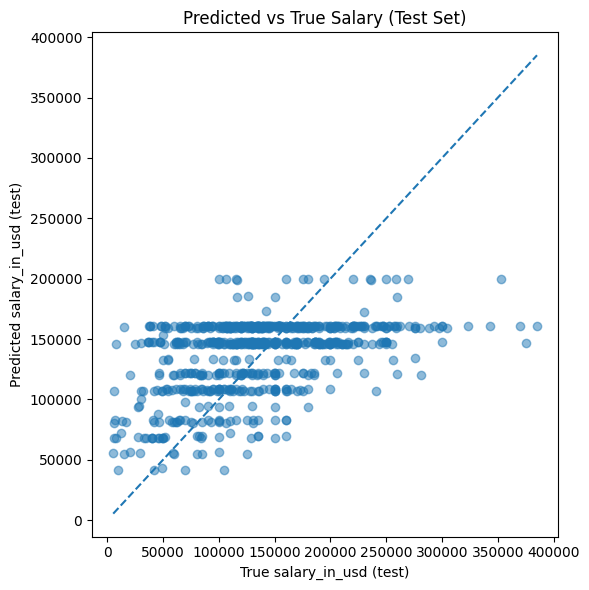

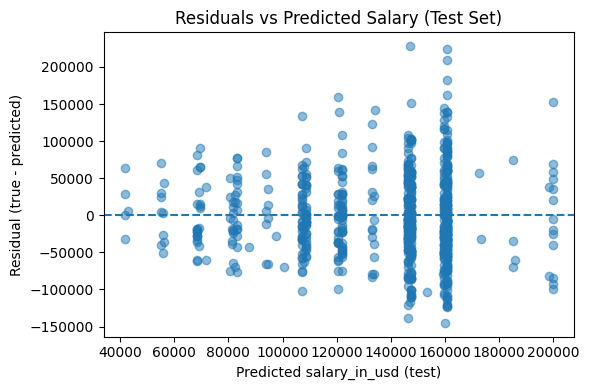

In [85]:
# Part 4
# Write the code to diagnose your model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. Compute predictions on train and test ----
y_train_pred = problem2_model.predict(problem2_X_train)
y_test_pred = problem2_model.predict(problem2_X_test)

# ---- 2. Compute regression metrics ----

# Training metrics
train_mse = mean_squared_error(problem2_y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(problem2_y_train, y_train_pred)
train_r2 = r2_score(problem2_y_train, y_train_pred)

# Test metrics
test_mse = mean_squared_error(problem2_y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(problem2_y_test, y_test_pred)
test_r2 = r2_score(problem2_y_test, y_test_pred)

print("=== Training metrics ===")
print(f"MSE  (train): {train_mse:.2f}")
print(f"RMSE (train): {train_rmse:.2f}")
print(f"MAE  (train): {train_mae:.2f}")
print(f"R^2  (train): {train_r2:.4f}")

print("\n=== Test metrics ===")
print(f"MSE  (test):  {test_mse:.2f}")
print(f"RMSE (test):  {test_rmse:.2f}")
print(f"MAE  (test):  {test_mae:.2f}")
print(f"R^2  (test):  {test_r2:.4f}")

# ---- 3. Plot: True vs Predicted salaries (test set) ----
plt.figure(figsize=(6, 6))
plt.scatter(problem2_y_test, y_test_pred, alpha=0.5)
# Diagonal line y = x for reference
min_val = min(problem2_y_test.min(), y_test_pred.min())
max_val = max(problem2_y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("True salary_in_usd (test)")
plt.ylabel("Predicted salary_in_usd (test)")
plt.title("Predicted vs True Salary (Test Set)")
plt.tight_layout()
plt.show()

# ---- 4. Plot: Residuals vs Predicted salaries (test set) ----
residuals_test = problem2_y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(0, linestyle="--")  # line at residual = 0
plt.xlabel("Predicted salary_in_usd (test)")
plt.ylabel("Residual (true - predicted)")
plt.title("Residuals vs Predicted Salary (Test Set)")
plt.tight_layout()
plt.show()


### Reasoning About the Model Performance from above:

The performance metrics indicate that the linear regression model is able to capture only a small portion of the variation in salaries. Both training and testing scores are similar, which shows that the model is **not overfitting**; instead, it is limited by the **predictive power of the chosen features**. The R² values (around 0.20) confirm that the model explains only about 20% of the salary variation, suggesting that important factors influencing salary are not included in the feature set. Additionally, RMSE and MAE values appear large, but this is expected because salaries in the dataset range widely—from around \$20,000 to over \$400,000. Overall, the linear model provides a basic approximation, but its performance is constrained by the simplicity of both the model and the available features.



-----
5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of problem2_model.coef_, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]



-----

---

## 5. [3p] Predicting a Specific Salary & Interpreting Coefficients

We want to predict the 2023 salary of a data scientist with the following characteristics:

- **work_year = 2023**  
- **experience_level = 1** (Mid level)  
- **employment_type = 1** (Full time)  
- **remote_ratio = 0** (No remote work)

A linear regression prediction is computed as

$$
\hat{y} = \beta_0 
+ \beta_1 \cdot \text{work\_year}
+ \beta_2 \cdot \text{experience\_level}
+ \beta_3 \cdot \text{employment\_type}
+ \beta_4 \cdot \text{remote\_ratio}.
$$

We place these values into a single-row DataFrame and call  
`problem2_model.predict(...)`.

### Interpreting the coefficient for remote_ratio

The coefficient corresponding to `remote_ratio` in  
`problem2_model.coef_` tells us whether higher remote work leads to a higher or lower predicted salary:

- If the coefficient is **positive**, then increasing remote_ratio increases predicted salary.
- If the coefficient is **negative**, then increasing remote_ratio decreases predicted salary.

---



In [89]:
# Part 5

import pandas as pd

# Create a one-row DataFrame representing the new observation
new_data = pd.DataFrame({
    "work_year": [2023],
    "experience_level": [1],   # Mid level
    "employment_type": [1],    # Full time
    "remote_ratio": [0]        # No remote work
})

# Use the trained model to predict the salary
problem2_predicted_salary = problem2_model.predict(new_data)[0]

print("Predicted salary:", problem2_predicted_salary)

# Check the coefficient for remote_ratio to understand its influence
remote_ratio_coef = problem2_model.coef_[problem2_features.index("remote_ratio")]
print("Coefficient for remote_ratio:", remote_ratio_coef)

# Interpretation comment:
# If remote_ratio_coef > 0 => higher remote_ratio gives higher predicted salary.
# If remote_ratio_coef < 0 => higher remote_ratio gives lower predicted salary.



Predicted salary: 121940.38437091932
Coefficient for remote_ratio: -13.029475233542966


-----
6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]

---

## 6. [3p] Empirical CDF of residuals with DKW 95% confidence band

We want to study the **distribution of the residuals on the test set** and add a **uniform confidence band** using the Dvoretzky–Kiefer–Wolfowitz (DKW) inequality.

---

### Step 1: Define residuals on the test set

For each test point $(i = 1,\dots,n)$, we have:

- True salary $(y_i)$ (from $(\text{problem2\_y\_test})$)
- Predicted salary $(\hat{y}_i)$ (from $(\text{problem2\_model.predict})$)

The **residual** is

$$
e_i = y_i - \hat{y}_i.
$$

Collect all test residuals in a vector

$$
e_1, e_2, \dots, e_n.
$$

---

### Step 2: Empirical distribution function (EDF) of the residuals

The **empirical distribution function** (EDF) of the residuals is defined as

$$
\hat{F}_n(t)
= \frac{1}{n} \sum_{i=1}^{n} \mathbf{1}\{ e_i \le t \},
$$

where $(\mathbf{1}\{\cdot\})$ is the indicator function.

In practice, we:

1. Sort the residuals:

   $$
   e_{(1)} \le e_{(2)} \le \dots \le e_{(n)},
   $$

2. At each sorted residual $(e_{(k)})$, the EDF jumps to

   $$ 
   \hat{F}_n\bigl(e_{(k)}\bigr) = \frac{k}{n}.
   $$

---

### Step 3: DKW inequality and 95% confidence band

Let $(F(t))$ be the **true CDF** of the residuals (unknown).  
The DKW inequality states that for any $(\varepsilon > 0)$,

$$
\mathbb{P}\!\left(
\sup_{t} \left| \hat{F}_n(t) - F(t) \right| > \varepsilon
\right)
\le
2 e^{-2 n \varepsilon^2}.
$$

To get a **\(95\%\)** (i.e. $(1-\alpha = 0.95)$) **uniform confidence band**, we set $(\alpha = 0.05)$ and solve

$$
2 e^{- 2 n \varepsilon^2 } = \alpha.
$$

Taking logarithms:

$$
e^{- 2 n \varepsilon^2 } = \frac{\alpha}{2}
\quad\Rightarrow\quad
-2 n \varepsilon^2 = \log \frac{\alpha}{2}
\quad\Rightarrow\quad
\varepsilon^2 = -\frac{1}{2n} \log \frac{\alpha}{2}.
$$

So

$$
\varepsilon_n
=
\sqrt{
-\frac{1}{2n} \log \frac{\alpha}{2}
}
=
\sqrt{
\frac{1}{2n} \log\!\left( \frac{2}{\alpha} \right)
}.
$$

For $(\alpha = 0.05)$,

$$
\varepsilon_n
=
\sqrt{
\frac{1}{2n} \log\!\left( \frac{2}{0.05} \right)
}
=
\sqrt{
\frac{1}{2n} \log(40)
}.
$$

---

### Step 4: Constructing the confidence band

For each $(t)$, the **95% confidence band** is

$$
\hat{F}_n(t) - \varepsilon_n
\le
F(t)
\le
\hat{F}_n(t) + \varepsilon_n,
$$

or in terms of lower and upper band functions:

$$
F^{-}(t) = \max\bigl( \hat{F}_n(t) - \varepsilon_n,\ 0 \bigr),
\qquad
F^{+}(t) = \min\bigl( \hat{F}_n(t) + \varepsilon_n,\ 1 \bigr).
$$

In the plot, we:

- Plot the EDF $(\hat{F}_n(t))$ as a step curve,
- Plot the lower band $(F^{-}(t))$,
- Plot the upper band $(F^{+}(t))$.

---

### Step 5: Interpretation — what does the band tell us?

The DKW band has the property that, with probability at least $(95\%)$,

$$
F(t) \in [F^{-}(t), F^{+}(t)] \quad \text{for all } t.
$$

In words:

- The band tells us how much **uncertainty** there is in the empirical CDF as an estimate of the true residual distribution.
- It is **uniform in \(t\)**: the guarantee holds simultaneously for all thresholds $(t)$.

**What can we use it for?**

- To assess how precisely we have estimated the distribution of residuals from a finite test sample.
- To check whether a **candidate theoretical distribution** for residuals (e.g. normal distribution) lies mostly within this band; if the theoretical CDF goes outside the band, this suggests a poor fit.
- More generally, to quantify uncertainty in distributional features of the residuals (e.g. quantiles, tail behavior) in a nonparametric way.

---


Number of test samples n = 751
DKW epsilon (95% band)  = 0.0496


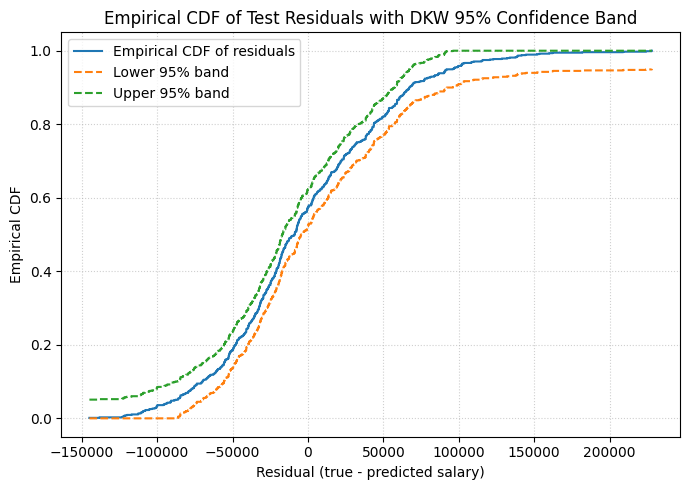

In [90]:
# Part 6
# Put the code for part 6 below this line

import numpy as np
import matplotlib.pyplot as plt

# 1. Recompute predictions and residuals on the test set (for clarity)
y_test_true = problem2_y_test
y_test_pred = problem2_model.predict(problem2_X_test)
residuals_test = y_test_true - y_test_pred

# Number of test samples
n = len(residuals_test)

# 2. Sort residuals and build empirical CDF values
residuals_sorted = np.sort(residuals_test)
ecdf_values = np.arange(1, n + 1) / n  # k/n for k = 1,...,n

# 3. Compute epsilon using the DKW inequality for 95% confidence
alpha = 0.05
epsilon = np.sqrt((1.0 / (2.0 * n)) * np.log(2.0 / alpha))

# 4. Compute lower and upper confidence bands (clipped to [0, 1])
lower_band = np.clip(ecdf_values - epsilon, 0.0, 1.0)
upper_band = np.clip(ecdf_values + epsilon, 0.0, 1.0)

print(f"Number of test samples n = {n}")
print(f"DKW epsilon (95% band)  = {epsilon:.4f}")

# 5. Plot the empirical CDF and the confidence band
plt.figure(figsize=(7, 5))

# Empirical CDF as a step function
plt.step(residuals_sorted, ecdf_values, where="post", label="Empirical CDF of residuals")

# Confidence band as two lines
plt.step(residuals_sorted, lower_band, where="post", linestyle="--", label="Lower 95% band")
plt.step(residuals_sorted, upper_band, where="post", linestyle="--", label="Upper 95% band")

plt.xlabel("Residual (true - predicted salary)")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDF of Test Residuals with DKW 95% Confidence Band")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.tight_layout()
plt.show()


-----

# NEW SECTION BEGINS

-----

# 1.13 Exam vB, PROBLEM 3  
Maximum Points = 13

For this problem we have the Diabetes dataset, I have encoded the categorical features
using One-Hot encoding, namely the following:

['smoking_No Info', 'smoking_current', 'smoking_ever', 'smoking_former', 
 'smoking_never', 'smoking_not current', 'sex_Female', 'sex_Male', 'sex_Other'].

Treating this as a classification problem, we will train a logistic regression model to predict whether
the patient has diabetes or not. Then the task is to evaluate the model and using it to make some
conclusions.

Instructions:

1. Load the file data/diabetes.csv into the pandas dataframe problem3_df.  
   Decide what should be features and target, give motivations for your choices. [3p]

2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the
   features and problem3_y being the target.  
   Do the standard train-test split with 80% training data and 20% testing data.  
   Store these in the variables defined in the cells. [2p]

3. Now train a Logistic regression model on the training data using  
   sklearn.linear_model.LogisticRegression.  
   Hint: If you use many of the One-Hot encoded features you will probably see a warning about  
   max iterations reached. Adjust the hyperparameter C (this is the penalization) when you create 
   your LogisticRegression. [2p]

4. Evaluation: Calculate the precision and recall for class 0 and 1 with 95% confidence bounds.  
   Explain their meaning. [3p]

5. Advanced question: Come up with a way to define the one-hot encoded feature that is most
   important for the prediction. Motivate your choice. [3p]


1.14 Part 1  
Double click this cell to enter edit mode and write your answer for part 1 below this line.

What features are reasonable?  
In regards to how much data we have, how many features do you think we should aim for?  
What other features would you like to have used but was not collected?  

Discussion


1. Load the file data/diabetes.csv into the pandas dataframe problem3_df.  
   Decide what should be features and target, give motivations for your choices. [3p]



In [88]:
# Part 1
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = XXX


NameError: name 'XXX' is not defined

In [ ]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem3_features = ["XXX"]

# Fill in the target as a string with the correct column name
problem3_target = "XXX"


2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the
   features and problem3_y being the target.  
   Do the standard train-test split with 80% training data and 20% testing data.  
   Store these in the variables defined in the cells. [2p]



In [ ]:
# Part 2
# Fill in your X and y below
problem3_X = XXX
problem3_y = XXX

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = XXX


3. Now train a Logistic regression model on the training data using  
   sklearn.linear_model.LogisticRegression.  
   Hint: If you use many of the One-Hot encoded features you will probably see a warning about  
   max iterations reached. Adjust the hyperparameter C (this is the penalization) when you create 
   your LogisticRegression. [2p]



In [ ]:
# Part 3
# Initialize your LogisticRegression model
problem3_model = XXX

# Fit your initialized model on the training data


1.15 Part 4  
Double click this cell to enter edit mode and write your answer for part 4 below this line.


4. Evaluation: Calculate the precision and recall for class 0 and 1 with 95% confidence bounds.  
   Explain their meaning. [3p]



In [ ]:
# Give the answer for each of the following quantities in the form of a tuple
# Example:
# if the precision for class 0 is between 0.31 and 0.69, write:
# problem3_precision_0 = (0.31, 0.69)

problem3_precision_0 = XXX
problem3_recall_0 = XXX
problem3_precision_1 = XXX
problem3_recall_1 = XXX


1.16 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


5. Advanced question: Come up with a way to define the one-hot encoded feature that is most
   important for the prediction. Motivate your choice. [3p]

In [ ]:
# Part 5
# Put whatever calculations you need here
